Students performance indicator

Life cycle of Machine learnig Project
    - Understand the Problem Statement
    - Data Collection
    - Data Checks to Perform
    - Exploratory Data analysis
    - Data Pre-Processing
    - Model Training
    - Choose Best model
    
1. Problem Statement
 >This project tries to understand the students marks are affected by other  variables like gender,ethenicity,lunch,parent's education,test prepration courses etc.

2. Data Collection
> data is collected from the kaggle 
> the data set consist of the 1000rows and 8 columns

2.1
> import data and required packages like pandas,numpy,matplotlib -> that helps to understand the data better and helps to find the insights from the data and trying to evaluate things from the better way.    

importing all the required libraries
> import numpy as np
> import panadas as pd
> import matplotlib.pyplot as plt
> import seaborn as sns

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing csv Data as the dataframe

In [6]:
data = pd.read_csv('data\stud.csv')

In [7]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Question that should be ask to check the data set is perfect or not
 >- Check missing values
 >- Check Duplicates
 >- Check Data type
 >- Check the number of unique values in each column
 >- check stats of the data set
 >- check various categories present in the different categorical columns 

In [10]:
data.isna().sum() # - this checks there is any missing value in the data or not

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [15]:
data.duplicated().sum() # - this checks there is any duplicate value in the data or not

np.int64(0)

In [17]:
data.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

#data sets description
theere are 2-genders - male and female
race_ethnicity -5 (a,b,c,d,e)
lunch -2 (having lunch before test(standard,free/reduced))
test prepration couse - complete or not complete before test
math score
reading score
writing_score

In [19]:
data.nunique()
# so according to the description present on the dataset we can conclude that all the n unique values are corect

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [20]:
data.describe() # this is used to get the stats of the data set

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [30]:
data.columns.astype('category')

CategoricalIndex(['gender', 'race_ethnicity', 'parental_level_of_education',
                  'lunch', 'test_preparation_course', 'math_score',
                  'reading_score', 'writing_score'],
                 categories=['gender', 'lunch', 'math_score', 'parental_level_of_education', 'race_ethnicity', 'reading_score', 'test_preparation_course', 'writing_score'], ordered=False, dtype='category')

Insights from the above evaluation:
- means are alsmost same for all the cases
- std dev is also very close to each for every column so, it is also correct
- there is might be some error in the row min row because the min for the maths is -0 and the min of reading and writings are - 17,10 which is little high as comapre to the maths
- and all the remaining parameters are almost same or nearby to each other which shows it is also correct there is no chances of error in these columns

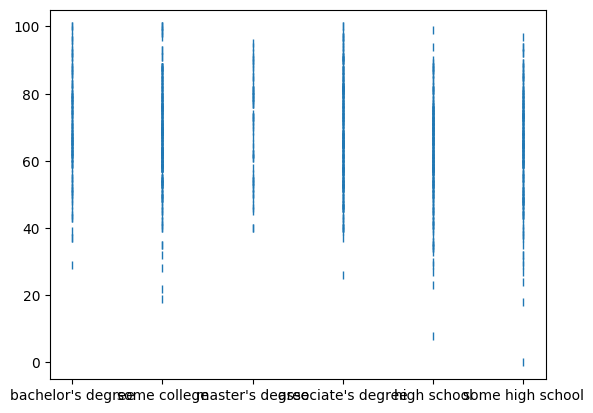

In [37]:
plt.plot(data.parental_level_of_education, data.math_score,'|')

In [39]:
#adding two new columns name total marks and average score
data['Total_marks'] = data['math_score']+data['reading_score']+data['writing_score']
data['Average_score'] = data['Total_marks']/3

<Axes: xlabel='parental_level_of_education'>

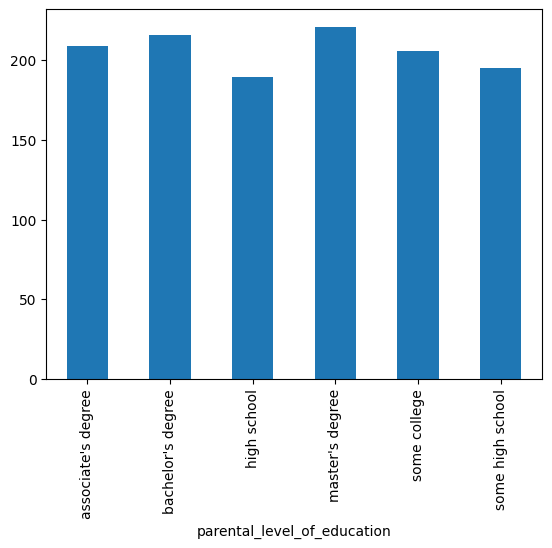

In [ ]:
data.groupby('parental_level_of_education').Total_marks.mean().plot(kind='bar')
# this graph shows there is no significance difference in between the total marks of the students based on the parental level of education
#conclusion - parents study level does not affect the students marks,there is slight difference in the marks but not be significant

<Axes: xlabel='race_ethnicity'>

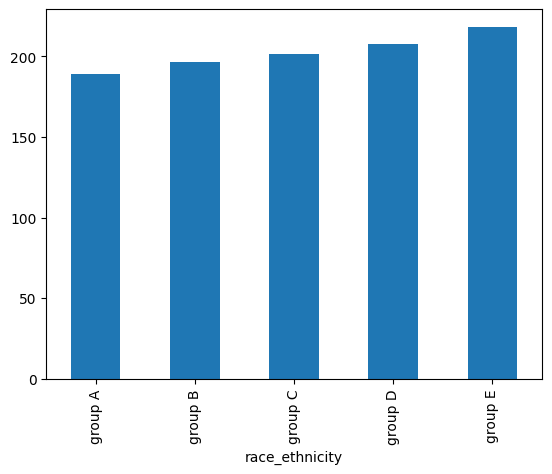

In [ ]:
data.groupby('race_ethnicity').Total_marks.mean().plot(kind = "bar")
# here we can say that there is a significant diference in the marks of the students depening on thier groups

<Axes: xlabel='lunch,parental_level_of_education'>

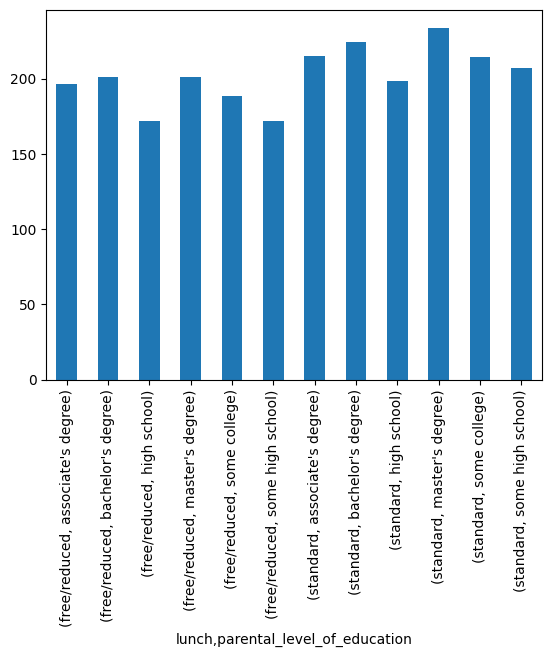

In [52]:
data.groupby(['lunch','parental_level_of_education']).Total_marks.mean().plot(kind = "bar")


definening numerical and categorical column of the data set


In [54]:
numerical_columns = [features for features in data.columns if data[features].dtypes != 'O']
categorical_columns = [columns for columns in data.columns if data[columns].dtypes == 'O']

print("we have {} numerical columns as:{}".format(len(numerical_columns),numerical_columns))
print("We have {} the categorical columns as:{}".format(len(categorical_columns),categorical_columns))


we have 5 numerical columns as:['math_score', 'reading_score', 'writing_score', 'Total_marks', 'Average_score']
We have 5 the categorical columns as:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


task1 -Find all the top scores of the subject and all the students who have lesser than 20 marks means that they are in fail category


In [57]:
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_marks,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [78]:
marks_maths_full = data[data['math_score'] == 100]['Average_score'].count()
marks_reading_full = data[data['reading_score']==100]['Average_score'].count()
marks_writing_full = data[data['writing_score']==1000]['Average_score'].count()

print(f"the totals students with the full marks in the maths are : {marks_maths_full}")
print(f"the totals students with the full marks in the reading are : {marks_reading_full}")
print(f"the totals students with the full marks in the writing are : {marks_writing_full}")

the totals students with the full marks in the maths are : 7
the totals students with the full marks in the reading are : 17
the totals students with the full marks in the writing are : 0


In [81]:
marks_maths_less = data[data['math_score']<=20]['Average_score'].count()
marks_reading_less = data[data['reading_score']<=20]['Average_score'].count()
marks_writing_less = data[data['writing_score']<=20]['Average_score'].count()

print(f"the totals students who fails in the maths are : {marks_maths_less}")
print(f"the totals students who fails in the reading are : {marks_reading_less}")
print(f"the totals students who fails in the writing are : {marks_writing_less}")

the totals students who fails in the maths are : 4
the totals students who fails in the reading are : 1
the totals students who fails in the writing are : 3


task2- plot the histogram to visulaize and get better understanding of the data sets

<Axes: xlabel='Average_score', ylabel='Count'>

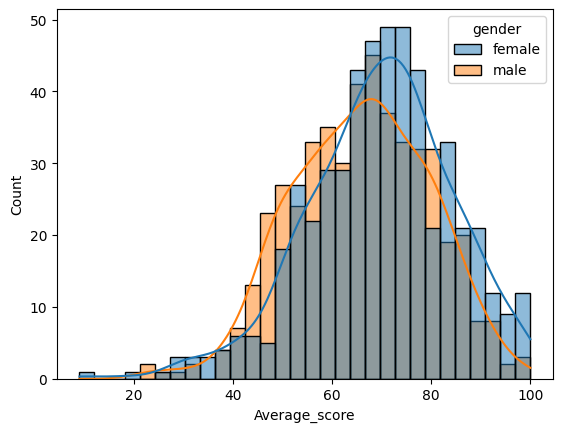

In [87]:
sns.histplot(data=data,x= 'Average_score',bins=30,kde=True,color='green',hue='gender')